In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


### Importing OSSL dataset

In [2]:
wet_chemistry_data = pd.read_csv('./dataset/ossl_soillab_L0_v1.2.csv')
spectral_data = pd.read_csv('./dataset/ossl_visnir_L0_v1.2.csv')

soilsite_data = pd.read_csv('./dataset/ossl_soilsite_L0_v1.2.csv')

/var/folders/rn/fbg5b19n6759xrg6__m9p_sr0000gn/T/ipykernel_54861/182126297.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  wet_chemistry_data = pd.read_csv('./dataset/ossl_soillab_L0_v1.2.csv')
/var/folders/rn/fbg5b19n6759xrg6__m9p_sr0000gn/T/ipykernel_54861/182126297.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  spectral_data = pd.read_csv('./dataset/ossl_visnir_L0_v1.2.csv')
/var/folders/rn/fbg5b19n6759xrg6__m9p_sr0000gn/T/ipykernel_54861/182126297.py:4: DtypeWarning: Columns (2,13,14,15,19,23,32) have mixed types. Specify dtype option on import or set low_memory=False.
  soilsite_data = pd.read_csv('./dataset/ossl_soilsite_L0_v1.2.csv')


### Merging dataset

In [3]:
merged_data = pd.merge( wet_chemistry_data, spectral_data, on='id.layer_uuid_txt')
merged_data = pd.merge( soilsite_data, merged_data, on='id.layer_uuid_txt')


In [4]:
#merged_data = merged_data[ merged_data["dataset.code_ascii_txt"]=="KSSL.SSL"]
merged_data.head()


,dataset.code_ascii_txt,id.layer_uuid_txt,id.layer_local_c,longitude.point_wgs84_dd,latitude.point_wgs84_dd,layer.sequence_usda_uint16,layer.upper.depth_usda_cm,layer.lower.depth_usda_cm,observation.date.begin_iso.8601_yyyy.mm.dd,observation.date.end_iso.8601_yyyy.mm.dd,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
0,AFSIS1.SSL,ded584d70bf0474202d30e575ae24784,icr072246,15.687492,-7.377750,1.0,0.0,20.0,2011-01-01,2013-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFSIS1.SSL,7c080e182bc23e19747629f46edbc6c4,icr072247,15.687492,-7.377750,2.0,20.0,50.0,2011-01-01,2013-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFSIS1.SSL,03bbd570dfd399bfd866ebcdf860de39,icr072266,15.687817,-7.351243,1.0,0.0,20.0,2011-01-01,2013-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFSIS1.SSL,887d316328ef950eeca33293bfe052bf,icr072267,15.687817,-7.351243,2.0,20.0,50.0,2011-01-01,2013-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFSIS1.SSL,ca03ce6e439b1909c5a4a771c0afa951,icr072286,15.687965,-7.331673,1.0,0.0,20.0,2011-01-01,2013-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting spectral and target colums name

In [5]:
spectral_columns = [col for col in merged_data.columns if 'scan_visnir' in col]

target_column = 'c.tot_usda.a622_w.pct'  # Adjust to the actual column name

### Cleaning the Dataset and splitting features and target

In [8]:

## Removing null values
cleaned_data = merged_data.dropna(subset=spectral_columns + [target_column])



## Taking data from 10th Percentile to 90th percentile for removing outliers
q_low = cleaned_data[target_column].quantile(0.10)
q_hi  = cleaned_data[target_column].quantile(0.9)
cleaned_data_filtered = cleaned_data[(cleaned_data[target_column] < q_hi) & (cleaned_data[target_column] > q_low)]

#cleaned_data_filtered = cleaned_data_filtered[(cleaned_data[target_column] <= 1)]


## Taking sample data for feature and target split
sampled_data = cleaned_data_filtered

X = sampled_data[spectral_columns]
y = sampled_data[target_column]




In [9]:
X.shape

(15845, 1076)

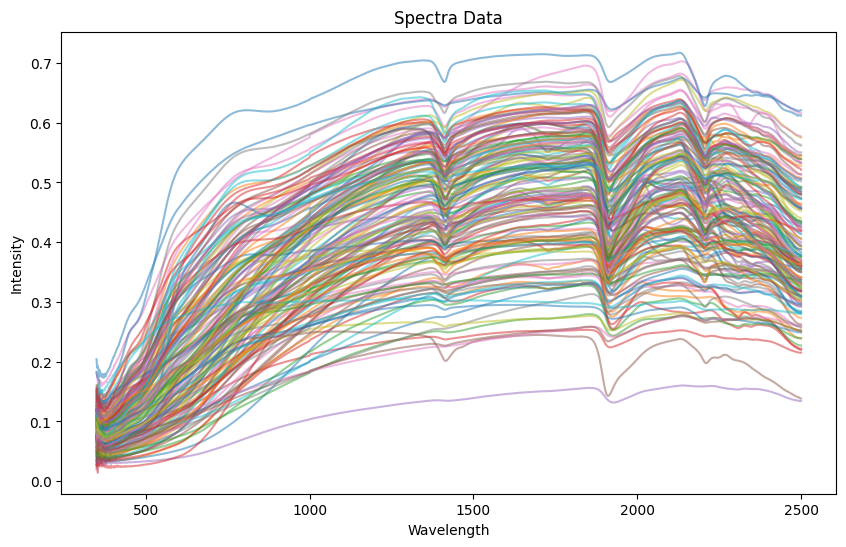

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your spectra DataFrame with column names in the format 'scan_mir.xxx_abs'

# Extract wavelength values from column names
wavelengths = np.array([int(col.split('.')[1].split('_')[0]) for col in X.columns])

# Plot the spectra data
plt.figure(figsize=(10, 6))
for i in range(0, len(X), 100):  # Plot every 1000th sample to avoid clutter
    plt.plot(wavelengths, X.iloc[i, :], alpha=0.5)

plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectra Data')
plt.show()


### Splitting Training and Testing data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the final model

In [14]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=50)
pls.fit(X_train_scaled, y_train)


PLSRegression(n_components=50)

## Testing the Final Model and Evaluating

In [15]:
y_pred = pls.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

def lccc(y_true, y_pred):
    pearson_corr = np.corrcoef(y_true, y_pred)[0, 1]
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    sd_true = np.std(y_true)
    sd_pred = np.std(y_pred)

    numerator = 2 * pearson_corr * sd_true * sd_pred
    denominator = var_true + var_pred + (mean_true - mean_pred) ** 2

    return numerator / denominator

lccc_value = lccc(y_test, y_pred)

print(f'R^2: {r2}')
print                   (f'RMSE: {rmse}')
print(f'LCCC: {lccc_value}')

R^2: 0.8626885815921453
RMSE: 4.925078551864775
LCCC: 0.925320240819047


In [16]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)


print(f'MAPE: {mape}%')

MAPE: 192.40938333831085%


## Plotting the results

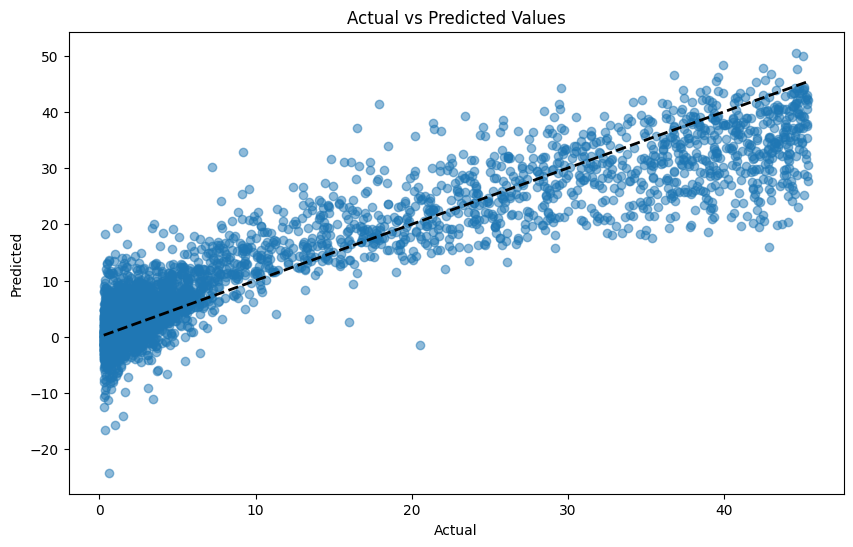

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


